In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [3]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [4]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [5]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [6]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


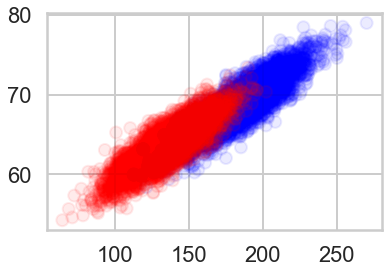

In [9]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08);

In [10]:
#from cs109 hw3, 2013
# from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [15]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [16]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print(max_score, best_C)

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users

0.9189333333333334 0.001


c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users

In [17]:
from sklearn.linear_model import LogisticRegression
clfl=LogisticRegression(C=0.001)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9188

In [18]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression(solver ='lbfgs' )
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), {'C': 1}, 0.9193333333333333)

In [19]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9196

In [31]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [32]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

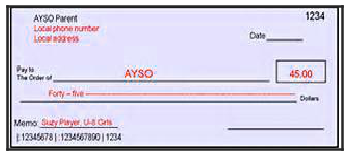

In [33]:
display_image(data[5])

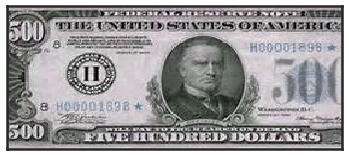

In [34]:
display_image(data[50])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [37]:
print(pca.explained_variance_ratio_.sum())

0.9424991661751607


In [38]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127946,  1.87404969,  1.73264636,  1.53023761,
        1.42159649,  1.31839382,  1.24701452,  1.16381811,  1.09958082,
        1.06072974,  1.00742374,  0.98023478,  0.96055566,  0.91534755,
        0.90185294,  0.85212712,  0.83673593,  0.79690778,  0.75488512,
        0.72503151,  0.70811469,  0.67960019,  0.66086867,  0.64763733,
        0.62735042,  0.59461433,  0.5828325 ,  0.57443128,  0.57254801,
        0.55223566,  0.53838621,  0.53273341,  0.51600153,  0.49300832,
        0.48492146,  0.47693511,  0.4723312 ,  0.45560731,  0.44376075,
        0.43941849,  0.43401643,  0.42618571,  0.4209218 ,  0.40961541,
        0.40297119,  0.38999394,  0.38807017,  0.38264227,  0.37496173,
        0.36010427,  0.35703826,  0.34794292,  0.33835265,  0.33159035])

In [39]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343469,-2133.778417,-328.319588,-1065.243084,79.785402,-424.990505,622.410343,-2490.216928,-858.589409,-1072.290033,277.106607,-1117.349866,712.640918,-787.480445,415.912424,-197.562174,472.728631,-429.522602,-610.359670,-590.353798,-266.570904,-991.758769,948.805723,1033.481388,571.045307,-39.667683,-109.293840,-522.280123,552.776740,-634.912543,77.168560,-750.101118,1241.168434,-621.773963,-120.453990,503.757556,327.545205,-251.072970,103.897591,-425.820308,866.803947,365.635220,-511.686287,422.639118,-315.529142,-33.159880,90.575545,582.690243,-400.645818,-700.954799,-414.588774,-247.114586,-111.943786,-243.264186,-318.704464,533.399470,-30.610661,-128.148006,210.647194
1,1,check,-22226.658684,-709.255594,-288.825694,-1300.638002,-792.085933,217.458749,1076.825752,-2115.197814,-875.464996,-1124.956969,-342.871265,-43.128447,547.365406,357.451375,-1761.546864,-372.357175,812.316691,293.266402,-939.933351,156.582630,-1124.199942,507.350195,-819.491720,716.882898,290.229678,-115.409662,821.505307,1157.204422,-348.847255,136.588689,-852.683159,600.030571,281.569378,152.422631,-680.065191,-677.259273,-71.329136,-173.865930,-123.770404,-373.699655,99.365509,120.012239,648.421842,14.995744,284.763736,13.254226,-88.400564,482.542733,-1071.547453,379.756190,-360.833223,-36.442488,-332.984111,316.371169,591.019926,-429.311069,471.719479,96.787356,-247.464779,248.570091
2,1,check,-17364.260784,-4252.027060,793.800594,-1362.060258,-374.244435,3142.136624,2514.317792,1443.679485,-120.880424,-420.176029,-2082.419516,1717.915179,-724.852305,-1241.273330,-312.279182,-1060.043904,1382.230043,-800.151246,-2597.006811,-876.883506,3382.974884,-387.054904,-3420.457219,1334.721367,-4750.797603,1041.123731,2219.354740,-673.191654,1407.495461,-2142.693480,-658.866619,1728.468619,1709.059289,-3153.660899,-798.596280,2230.950966,-3272.872990,2886.267477,1018.752304,179.358106,1315.878182,-2772.520681,4093.320649,1383.334613,1137.046387,581.846602,-717.736259,-1351.583745,-404.242712,-2513.115886,-2582.237797,779.407489,-2478.294980,-2185.494441,-1517.638787,-2076.466730,217.951227,-490.863730,-961.082488,-1149.184358
3,1,check,-22847.256199,-900.591534,577.204238,-180.311934,-733.145741,-107.956752,1442.044228,-1069.844011,844.862966,-1389.687075,1469.541078,-724.710848,-575.065628,-259.585014,932.864930,171.897093,-300.683239,865.419326,-178.953805,1225.648519,551.685022,-178.321240,-333.990463,-366.968409,-942.573847,163.062339,1320.419016,96.634983,-281.475343,-462.212057,-108.273417,-18.157967,87.555153,802.338310,-247.744262,694.574742,367.869450,331.784410,83.090685,-340.405112,1553.365545,-962.432158,-842.622257,356.357020,205.067932,-492.001009,-704.789247,-550.475895,827.306373,-1557.158347,106.517227,-335.324665,259.010746,-178.047528,-113.695893,1180.206314,-132.758555,-549.224456,823.120418,-973.564629
4,1,check,-15868.672594,3259.491986,506.796883,-919.643964,2166.539737,-981.690373,-1669.874446,-391.176031,1735.761909,163.751462,-1627.699351,-557.163065,-861.509413,1721.655936,943.525057,-1130.452304,2140.766119,770.243187,-1096.402014,593.405356,-25.713498,87.074782,-500.337816,1101.734831,321.391505,-1218.468296,-723.176179,-748.503681,-166.798236,-959.721546,1018.707952,-3624.106162,2196.004908,-3332.674669,-1021.158541,-2028.596961,1803.205796,2175.421836,2567.969168,-491.596711,248.322562,1591.039358,1054.258878,-1331.713708,-388.541530,-965.607208,529.502365,1049.467085,-3167.812747,1521.205124,-678.872067,1335.583689,-1468.633533,-15.821788,3149.914718,2282.046360,-1361.849511,-2122.780063,-2215.669638,1085.180425


In [40]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

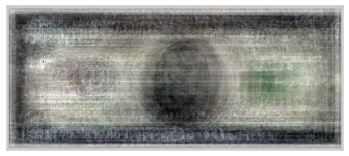

In [41]:
display_component(pca,0)

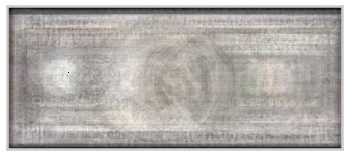

In [42]:
display_component(pca,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


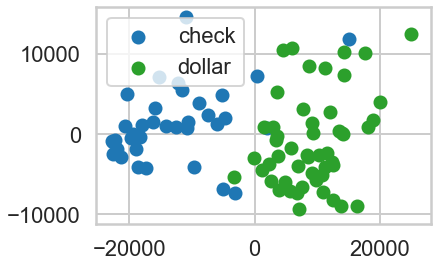

In [43]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print("Accuracy on training data: %0.2f" % (training_accuracy))
        print("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.9142857142857143)

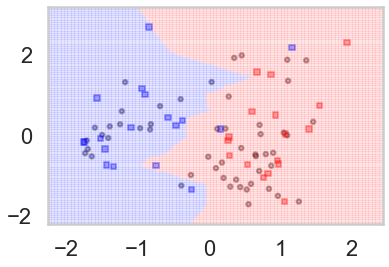

In [47]:
classify(Xs,ys,1)

Accuracy on training data: 0.63
Accuracy on test data:     0.51


(50, 0.6346153846153846, 0.5142857142857142)

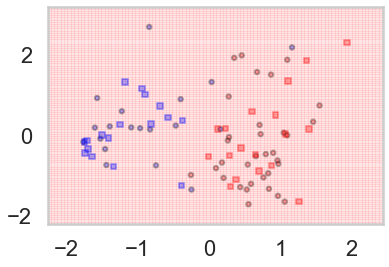

In [48]:
classify(Xs,ys,50)#run this a few times

In [49]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

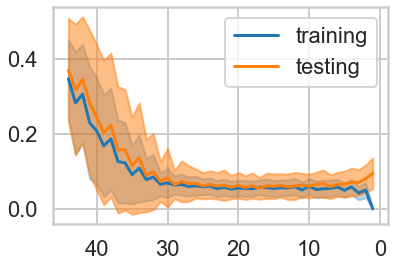

In [50]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

In [52]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [54]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [55]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 1}
Accuracy on training data: 1.00
Accuracy on test data:     0.83


c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


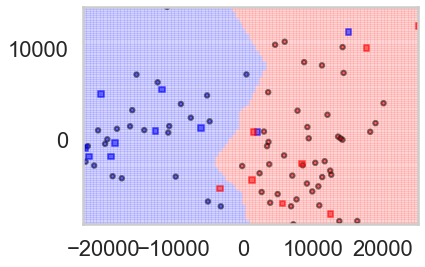

In [56]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

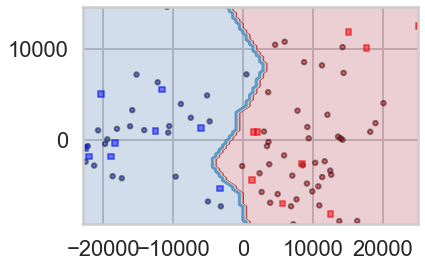

In [57]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[7, 1],
       [2, 8]], dtype=int64)

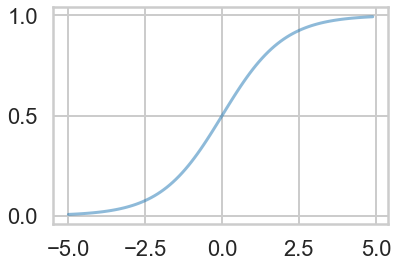

In [59]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

In [60]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [61]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, dflog, ['Weight', 'Height'], 'Gender','Male')

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users

BEST PARAMS {'C': 0.1}
Accuracy on training data: 0.92
Accuracy on test data:     0.91


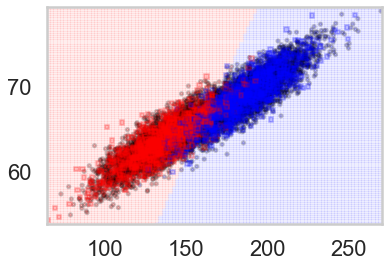

In [62]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [63]:
clf_l.predict_proba(Xtest_l)

array([[9.31706664e-01, 6.82933365e-02],
       [9.88016536e-01, 1.19834642e-02],
       [1.32422107e-03, 9.98675779e-01],
       ...,
       [2.68595399e-04, 9.99731405e-01],
       [5.46977856e-02, 9.45302214e-01],
       [2.42434293e-01, 7.57565707e-01]])

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

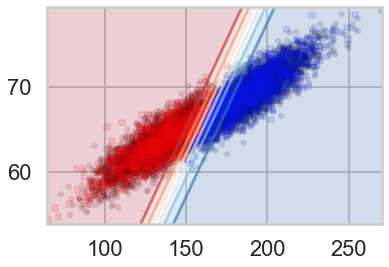

In [64]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);